<a href="https://colab.research.google.com/github/M4rck0/Aprendizaje_Automatico/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3. Estadística descriptiva

In [59]:
# Librerías
import pandas as pd # Leer archivos
import statistics # Estadística
from scipy.stats import pearsonr # Correlación de Pearson

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Información del área metropolitana de Boston
df = pd.read_csv('/content/bd_boston.csv')
df

,valor_vivienda,tasa_crimen,habitaciones_prom
0,24.0,0.00632,6.575
1,21.6,0.02731,6.421
2,34.7,0.02729,7.185
3,33.4,0.03237,6.998
4,36.2,0.06905,7.147
...,...,...,...
501,22.4,0.06263,6.593
502,20.6,0.04527,6.120
503,23.9,0.06076,6.976
504,22.0,0.10959,6.794


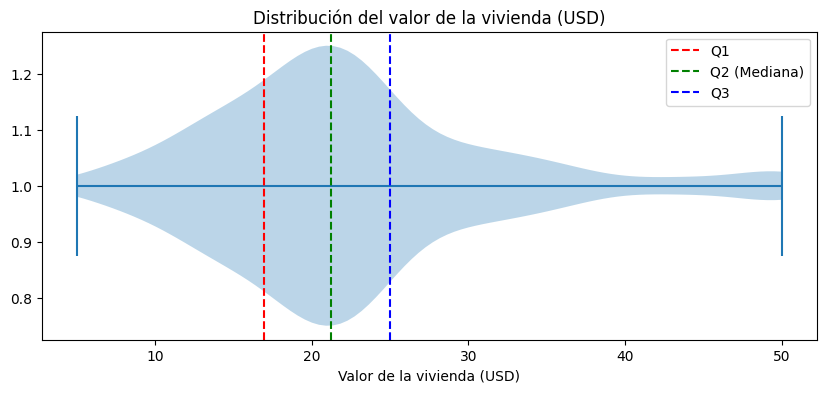

In [35]:
# Distribución del valor de la vivienda (USD)

plt.figure(figsize=(10, 4))
plt.violinplot(df["valor_vivienda"], vert=False) # Gráfico violín
q1, q2, q3 = statistics.quantiles(df["valor_vivienda"], n=4) # Cuartiles

# Líneas de cuartiles
plt.axvline(x=q1, color="red", linestyle="--", label="Q1")
plt.axvline(x=q2, color="green", linestyle="--", label="Q2 (Mediana)")
plt.axvline(x=q3, color="blue", linestyle="--", label="Q3")

plt.title("Distribución del valor de la vivienda (USD)")
plt.xlabel("Valor de la vivienda (USD)")
plt.legend()
plt.show()

# Conclusión
# La distribución está sesgada a la derecha, no se ajusta bien a una distribución normal, i.e. no paramétrica.

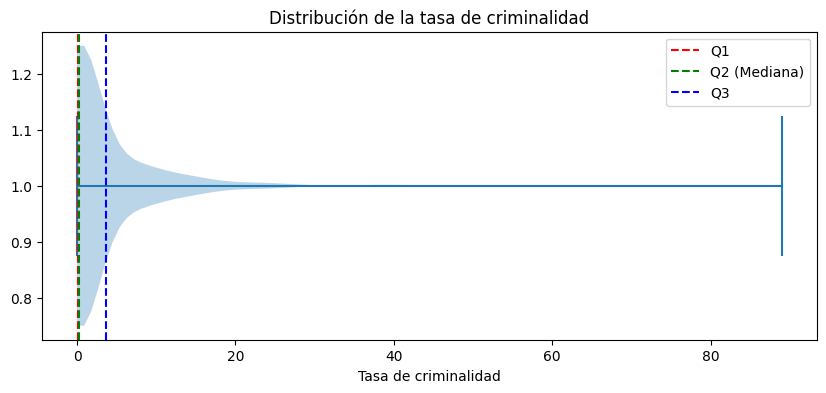

In [36]:
# Distribución de la tasa de criminalidad

plt.figure(figsize=(10, 4))
plt.violinplot(df["tasa_crimen"], vert=False) # Gráfico violín
q1, q2, q3 = statistics.quantiles(df["tasa_crimen"], n=4) # Cuartiles

# Líneas de cuartiles
plt.axvline(x=q1, color="red", linestyle="--", label="Q1")
plt.axvline(x=q2, color="green", linestyle="--", label="Q2 (Mediana)")
plt.axvline(x=q3, color="blue", linestyle="--", label="Q3")

plt.title("Distribución de la tasa de criminalidad")
plt.xlabel("Tasa de criminalidad")
plt.legend()
plt.show()

# Conclusión
# La distribución parece ajustarse bien a una distribución gamma, i.e. paramétrica.

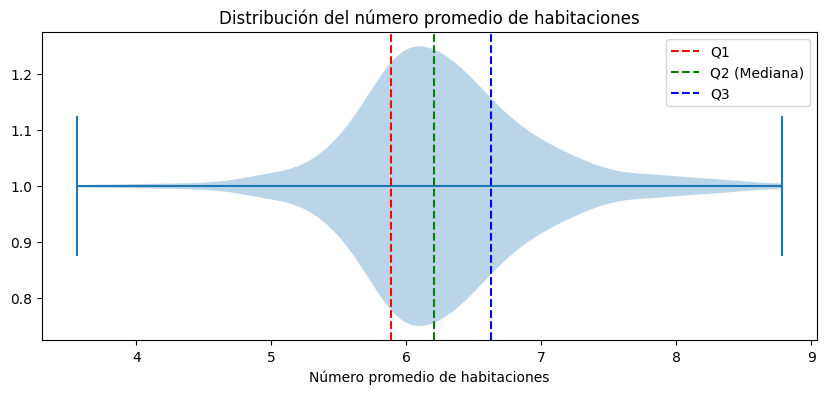

In [37]:
# Distribución del número promedio de habitaciones

plt.figure(figsize=(10, 4))
plt.violinplot(df["habitaciones_prom"], vert=False) # Gráfico violín
q1, q2, q3 = statistics.quantiles(df["habitaciones_prom"], n=4) # Cuartiles

# Líneas de cuartiles
plt.axvline(x=q1, color="red", linestyle="--", label="Q1")
plt.axvline(x=q2, color="green", linestyle="--", label="Q2 (Mediana)")
plt.axvline(x=q3, color="blue", linestyle="--", label="Q3")

plt.title("Distribución del número promedio de habitaciones")
plt.xlabel("Número promedio de habitaciones")
plt.legend()
plt.show()

# Conclusión
# La distribución está sesgada a la derecha, no se ajusta bien a una distribución normal, i.e. no paramétrica.

In [38]:
# Estadísticos descriptivos
print(df.describe())

       valor_vivienda  tasa_crimen  habitaciones_prom
count      506.000000   506.000000         506.000000
mean        22.532806     3.613524           6.284634
std          9.197104     8.601545           0.702617
min          5.000000     0.006320           3.561000
25%         17.025000     0.082045           5.885500
50%         21.200000     0.256510           6.208500
75%         25.000000     3.677083           6.623500
max         50.000000    88.976200           8.780000


## Correlación

In [39]:
print(df.corr())

                   valor_vivienda  tasa_crimen  habitaciones_prom
valor_vivienda           1.000000    -0.388305           0.695360
tasa_crimen             -0.388305     1.000000          -0.219247
habitaciones_prom        0.695360    -0.219247           1.000000


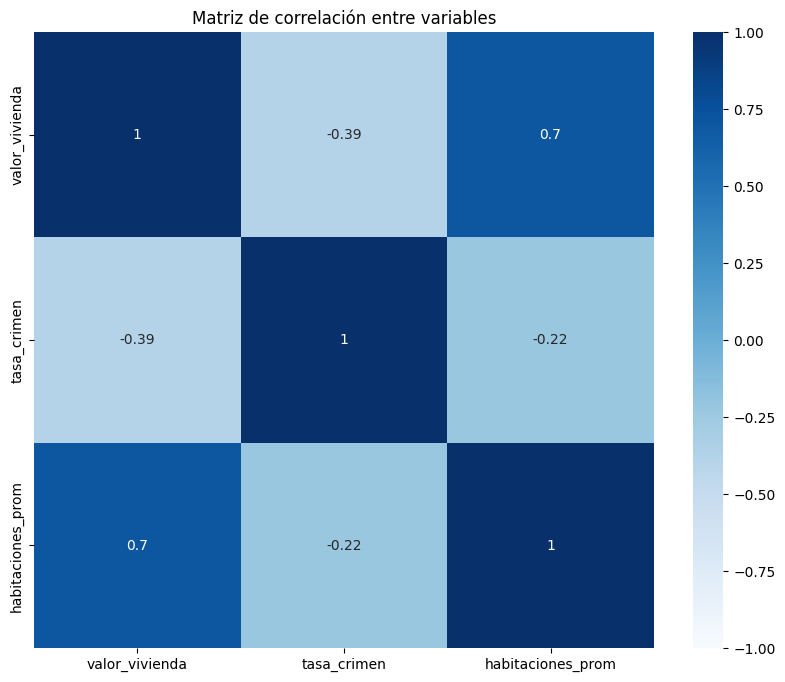

In [49]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title("Matriz de correlación entre variables")
plt.show()

In [56]:
x = df["valor_vivienda"]
y = df["habitaciones_prom"]

# Prueba de hipótesis
valor_p = pearsonr(x, y)[1]

print("Valor-p:", valor_p)
# Se realizó una prueba de hipótesis para verificar la correlación entre el valor de la vivienda y el número promedio de habitaciones.
# Arrojó un valor p < 0.05, por lo que se rechaza la hipótesis nula y se concluye que existe una correlación positiva significativa entre ambas variables.

Valor-p: 2.487228871007625e-74
